Q1

In [4]:
types = [ComplexF64, Complex{AbstractFloat}, Complex{<:AbstractFloat}, AbstractFloat, Union{Float64, ComplexF64}, Int32, Matrix{Float32}, Base.RefValue]

8-element Vector{Type}:
 ComplexF64 (alias for Complex{Float64})
 Complex{AbstractFloat}
 Complex{<:AbstractFloat}
 AbstractFloat
 Union{Float64, ComplexF64}
 Int32
 Matrix{Float32} (alias for Array{Float32, 2})
 Base.RefValue

In [5]:
func = [Base.isconcretetype, Base.isprimitivetype, Base.isabstracttype, Base.isbitstype, Base.ismutabletype]

5-element Vector{Function}:
 isconcretetype (generic function with 1 method)
 isprimitivetype (generic function with 1 method)
 isabstracttype (generic function with 1 method)
 isbitstype (generic function with 1 method)
 ismutabletype (generic function with 1 method)

In [19]:
for t in types
    for f in func
        print(f(t))
    end
end

truefalsefalsetruefalsetruefalsefalsefalsefalsefalsefalsefalsefalsefalsefalsefalsetruefalsefalsefalsefalsefalsefalsefalsetruetruefalsetruefalsetruefalsefalsefalsetruefalsefalsefalsefalsetrue

In [20]:
for t in types
    for f in func
        print(f(t))
        print(' ')
    end
    print('\n')
end

true false false true false 
true false false false false 
false false false false false 
false false true false false 
false false false false false 
true true false true false 
true false false false true 
false false false false true 


|type of  |is concrete|is primitive	|is abstract	|is bits type	|is mutable|
|    :----:   |    :----:   |    :----:   |    :----:   |    :----:   | :----:   |
|ComplexF64| true | false | false | true | false | 
|Complex{AbstractFloat}| true | false | false | false | false | 
|Complex{<:AbstractFloat}| false | false | false | false | false | 
|AbstractFloat| false | false | true | false | false | 
|Union{Float64, ComplexF64}| false | false | false | false | false | 
|Int32| true | true | false | true | false | 
|Matrix{Float32}| true | false | false | false | true | 
|Base.RefValue| false | false | false | false | true | 


Q2

In [7]:
using Distributions, LinearAlgebra, Random

In [8]:
function random_walk(STEP::Int)
    #initialize the problem
    d = MvNormal(zeros(2), Diagonal(ones(2)))
    dx = rand(d, STEP)
    x = Array{Float64, 2}(undef, 2, STEP + 1)
    x[1, 1] = 0
    x[2, 1] = 0

    #random walk
    for step = 1 : STEP
        for j in 1:2
            x[j, step + 1] = x[j, step] + dx[j, step]
        end
    end
    return x
end

random_walk (generic function with 1 method)

In [9]:
STEP = 10000
x = random_walk(STEP)

2×10001 Matrix{Float64}:
 0.0   0.220919   1.21717   2.46457  …  -128.681   -129.374   -129.107
 0.0  -1.89146   -1.99244  -2.14312       72.9469    73.3905    72.4996

In [10]:
using BenchmarkTools

In [11]:
@benchmark random_walk(STEP)
# wow that is really fast...

BenchmarkTools.Trial: 10000 samples with 1 evaluation.
 Range (min … max):  154.831 μs …   6.031 ms  ┊ GC (min … max): 0.00% … 94.79%
 Time  (median):     301.543 μs               ┊ GC (median):    0.00%
 Time  (mean ± σ):   330.835 μs ± 388.558 μs  ┊ GC (mean ± σ):  9.71% ±  7.76%

                                  ▂▅█▄▃                          
  ▃▄▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▂▂▂▁▂▁▁▁▁▁▁▂▃▇██████▆▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂ ▃
  155 μs           Histogram: frequency by time          411 μs <

 Memory estimate: 312.81 KiB, allocs estimate: 6.

In [12]:
using Plots

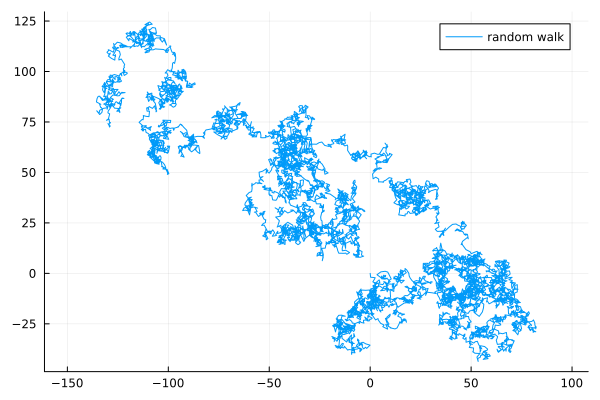

In [13]:
x_max = maximum(x[1,:])
x_min = minimum(x[1,:])

y_max = maximum(x[2,:])
y_min = minimum(x[2,:])

max_xy = max(x_max, y_max)
min_xy = min(x_min, y_min)


plot(x[1,:], x[2, :]; aspect_ratio=:equal,  label = "random walk")